In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Вам даны данные результатов ЕГЭ по различным предметам. Выполните следующие действия:

### Задания для выполнения

##### 1. Загрузите данные по вариантам в ноутбук.
##### 2.Сделайте описательную статистику полученных данных.

In [81]:
rl = pd.read_excel("data/Вариант 1.xlsx", skiprows=2, index_col='№')
rl["Дисциплина"] = "Русский язык"


math = pd.read_excel("data/Вариант 2.xlsx", skiprows=2, index_col='№')
math["Дисциплина"] = "Математика"


physics = pd.read_excel("data/Вариант 3.xlsx", skiprows=2, index_col='№')
physics["Дисциплина"] = "Физика"


informatics = pd.read_excel("data/Вариант 4.xlsx", skiprows=2, index_col='№')
informatics["Дисциплина"] = "Информатика"



rl.head()

,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл,Дисциплина
№,,,,,,,,,,,
1.0,117.0,11,М,341.0,1+++--1+-++---0---------0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8.0,20.0,24.0,Русский язык
2.0,148.0,12А,М,338.0,1+---+0--+---+0----++-+-0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8.0,20.0,24.0,Русский язык
3.0,152.0,13,Ж,104.0,2-----0--+----1---------1,0(1)0(3)0(1)0(3)0(2)0(2)0(3)1(3)0(2)1(2)1(1)1(1),NaN,9.0,22.0,24.0,Русский язык
4.0,152.0,13,М,104.0,1+--+-0++-----2----++---0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,9.0,22.0,24.0,Русский язык
5.0,132.0,11,М,337.0,1++---0-+++---1----+----2,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,10.0,24.0,24.0,Русский язык


In [82]:
rl.tail(3)


# крайняя строка, содержит только информацию по баллам - среднее значение, от него можно избавиться

,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл,Дисциплина
№,,,,,,,,,,,
3047.0,147.0,11,Ж,337.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.000000,24.0,Русский язык
3048.0,144.0,11А,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.000000,24.0,Русский язык
NaN,NaN,NaN,NaN,NaN,NaN,NaN,Среднее значение,NaN,72.769029,NaN,Русский язык


In [83]:
rl["Балл"].mean()

72.76902887139107

In [84]:
# Удаляем последннюю строку, ни на что не влияющую. Там среднее значение по баллам
rl = rl.dropna(subset=["Минимальный балл"])
math = math.dropna(subset=["Минимальный балл"])
physics = physics.dropna(subset=["Минимальный балл"])
informatics = informatics.dropna(subset=["Минимальный балл"])

rl.tail(3)

,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл,Дисциплина
№,,,,,,,,,,,
3046.0,147.0,11,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.0,24.0,Русский язык
3047.0,147.0,11,Ж,337.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.0,24.0,Русский язык
3048.0,144.0,11А,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.0,24.0,Русский язык


In [85]:
# Смотрим кол-во строк в каждом фрейме

rl.shape, math.shape, physics.shape, informatics.shape

((3048, 11), (2356, 11), (1180, 11), (141, 11))

In [86]:
# Объединяем
df = pd.concat([rl, math, physics, informatics], axis=0)


df

,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл,Дисциплина
№,,,,,,,,,,,
1.0,117.0,11,М,341.0,1+++--1+-++---0---------0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8.0,20.0,24.0,Русский язык
2.0,148.0,12А,М,338.0,1+---+0--+---+0----++-+-0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8.0,20.0,24.0,Русский язык
3.0,152.0,13,Ж,104.0,2-----0--+----1---------1,0(1)0(3)0(1)0(3)0(2)0(2)0(3)1(3)0(2)1(2)1(1)1(1),NaN,9.0,22.0,24.0,Русский язык
4.0,152.0,13,М,104.0,1+--+-0++-----2----++---0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,9.0,22.0,24.0,Русский язык
5.0,132.0,11,М,337.0,1++---0-+++---1----+----2,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,10.0,24.0,24.0,Русский язык
...,...,...,...,...,...,...,...,...,...,...,...
137.0,148.0,11,Ж,328.0,+++++++++++++++++++--++,3(3)2(2)3(3)4(4),NaN,33.0,94.0,40.0,Информатика
138.0,147.0,11,М,333.0,+++++++++++++++++++++++,3(3)2(2)2(3)4(4),NaN,34.0,97.0,40.0,Информатика
139.0,140.0,11,М,329.0,+++++++++++++++++++-+++,3(3)2(2)3(3)4(4),NaN,34.0,97.0,40.0,Информатика


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 6725 entries, 1.0 to 141.0
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   № школы                        6725 non-null   float64
 1   Класс                          6725 non-null   object 
 2   Пол                            6725 non-null   object 
 3   Номер варианта                 6725 non-null   float64
 4   Задания с кратким ответом      6725 non-null   object 
 5   Задания с развёрнутым ответом  6725 non-null   object 
 6   Устная часть                   0 non-null      object 
 7   Первичный балл                 6725 non-null   float64
 8   Балл                           6725 non-null   float64
 9   Минимальный балл               6725 non-null   float64
 10  Дисциплина                     6725 non-null   object 
dtypes: float64(5), object(6)
memory usage: 630.5+ KB


In [88]:
df.describe()

,№ школы,Номер варианта,Первичный балл,Балл,Минимальный балл
count,6725.000000,6725.000000,6725.000000,6725.000000,6725.000000
mean,136.971301,337.861264,27.825725,60.644015,27.492045
std,31.344428,45.143771,17.013571,19.203487,4.647171
min,104.000000,101.000000,0.000000,0.000000,24.000000
25%,128.000000,337.000000,11.000000,45.000000,24.000000
50%,136.000000,341.000000,27.000000,62.000000,27.000000
75%,147.000000,345.000000,44.000000,74.000000,27.000000
max,1106.000000,706.000000,58.000000,100.000000,40.000000


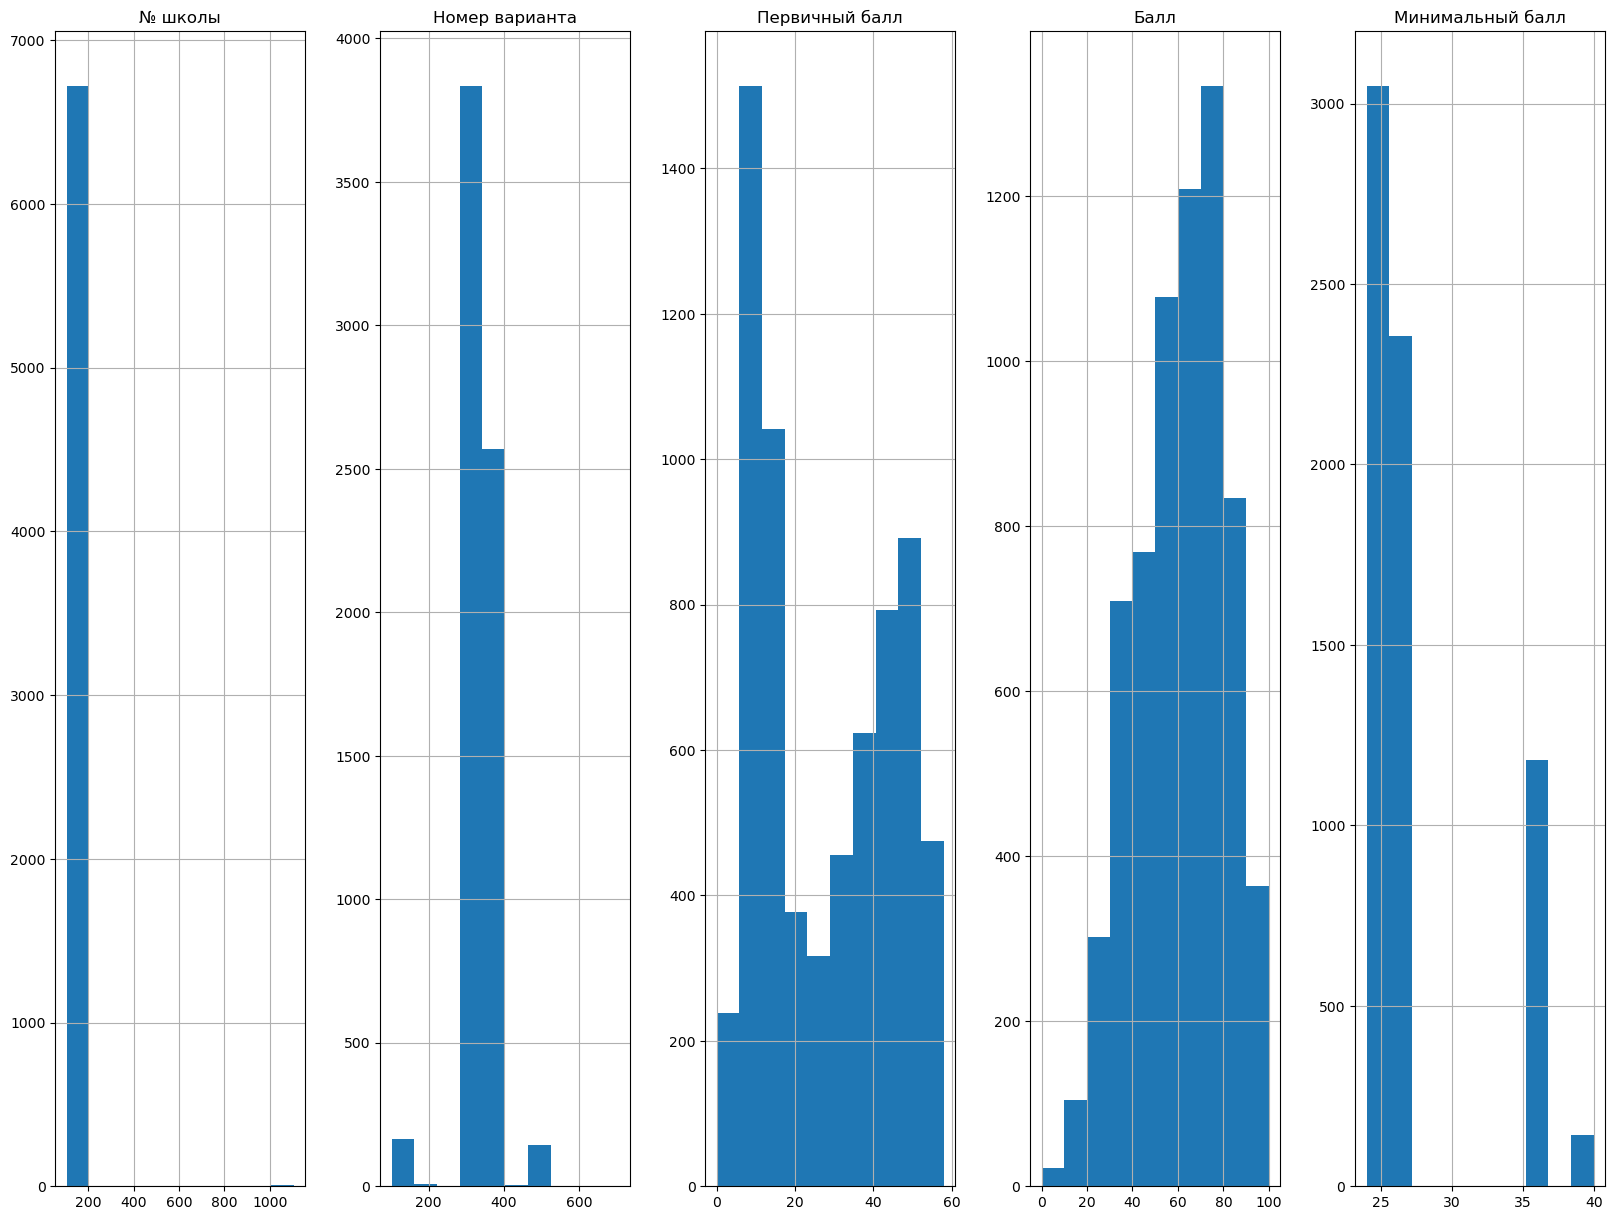

In [89]:
df.hist(figsize=(20, 15), layout=(-1, 5));

##### 2. Найдите процент учащихся, выполнивших работу ниже среднего.

In [90]:
def below_average(df):
    average = df["Балл"].mean()
    
    df["Выше среднего"] = df["Балл"].apply(lambda x: x > average)
    
    
    return f"Средний балл: {round(average, 1)}\nПроцент учащихся выполнивших работу ниже среднего: {round((df.shape[0] - df['Выше среднего'].sum()) / df.shape[0] * 100, 2)}%\n"
    
    
for k, v in zip(["Русский Язык", "Математика", "Физика", "Информатика и ИКТ", "Общая по 4 предметам"], [rl, math, physics, informatics, df]):
    print(f"{k:>18}:\n{below_average(v)}")

      Русский Язык:
Средний балл: 72.8
Процент учащихся выполнивших работу ниже среднего: 51.28%

        Математика:
Средний балл: 49.3
Процент учащихся выполнивших работу ниже среднего: 48.01%

            Физика:
Средний балл: 52.0
Процент учащихся выполнивших работу ниже среднего: 56.27%

 Информатика и ИКТ:
Средний балл: 60.8
Процент учащихся выполнивших работу ниже среднего: 46.1%

Общая по 4 предметам:
Средний балл: 60.6
Процент учащихся выполнивших работу ниже среднего: 45.84%



##### 3. Найти процент учащихся не сдавших экзамен.

In [91]:
def get_lose(df):
    df["Зачет"] = df["Балл"] >= df["Минимальный балл"]
    
    return f"Процент учащихся не сдавших экзамен: {round((df.shape[0] - df['Зачет'].sum()) / df.shape[0] * 100, 2)}%"


for k, v in zip(["Русский Язык", "Математика", "Физика", "Информатика и ИКТ", "Общая по 4 предметам"], [rl, math, physics, informatics, df]):
    print(f"{k:>18}:\n{get_lose(v)}\n")

      Русский Язык:
Процент учащихся не сдавших экзамен: 0.13%

        Математика:
Процент учащихся не сдавших экзамен: 9.21%

            Физика:
Процент учащихся не сдавших экзамен: 7.71%

 Информатика и ИКТ:
Процент учащихся не сдавших экзамен: 11.35%

Общая по 4 предметам:
Процент учащихся не сдавших экзамен: 4.88%



##### 4. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.

Text(0.5, 1.0, 'Общая за 4 экзамена')

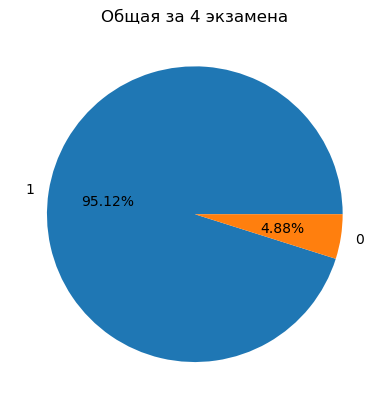

In [92]:
df["Зачет"].astype(int).value_counts().plot(kind="pie", autopct='%1.2f%%')


plt.ylabel("")
plt.title("Общая за 4 экзамена") 

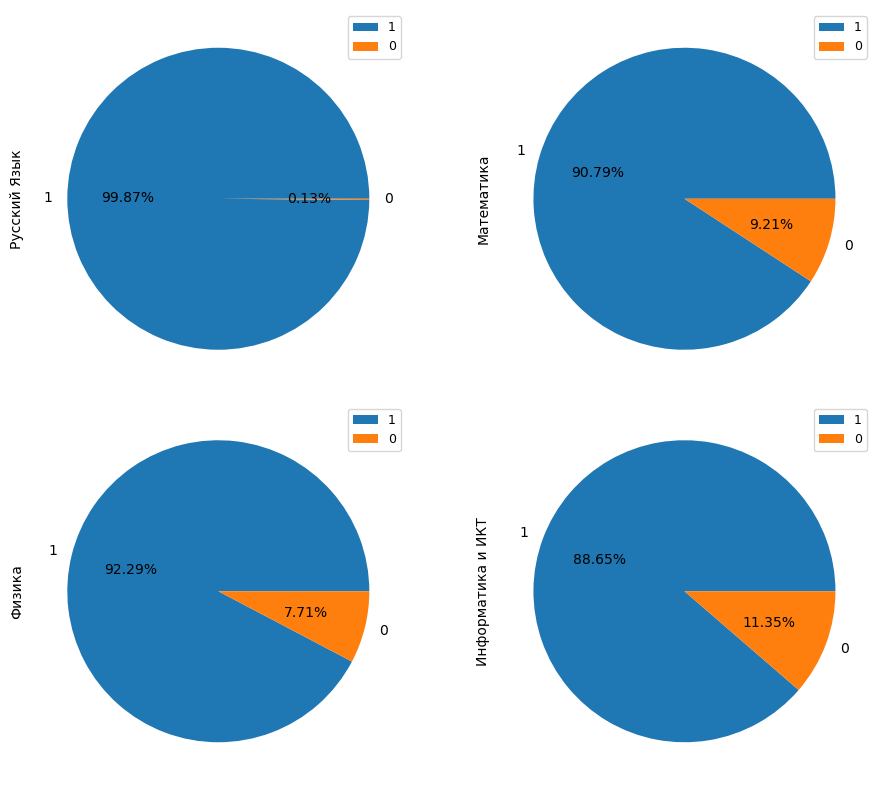

In [93]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Первый подграфик
rl["Зачет"].astype(int).value_counts().plot(kind="pie", x='Балл', label="Русский Язык", ax=ax[0, 0], autopct='%1.2f%%')
ax[0, 0].legend(fontsize=9)

# Второй подграфик
math["Зачет"].astype(int).value_counts().plot(kind="pie", x='Балл', label="Математика", ax=ax[0, 1], autopct='%1.2f%%')
ax[0, 1].legend(fontsize=9)

# Третий подграфик
physics["Зачет"].astype(int).value_counts().plot(kind="pie", x='Балл', label="Физика", ax=ax[1, 0], autopct='%1.2f%%')
ax[1, 0].legend(fontsize=9)

# Четвертый подграфик
informatics["Зачет"].astype(int).value_counts().plot(kind="pie", x='Балл', label="Информатика и ИКТ", ax=ax[1, 1], autopct='%1.2f%%')
ax[1, 1].legend(fontsize=9)

# Отобразить график
plt.tight_layout()
plt.show()


##### 5. Постройте ядерную оценку плотности распределению баллов за экзамен.

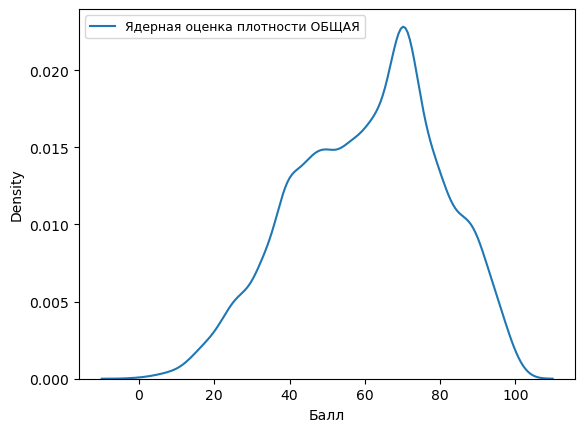

In [94]:
sns.kdeplot(data=df, x='Балл', label="Ядерная оценка плотности ОБЩАЯ")
plt.legend(fontsize=9)
plt.show()

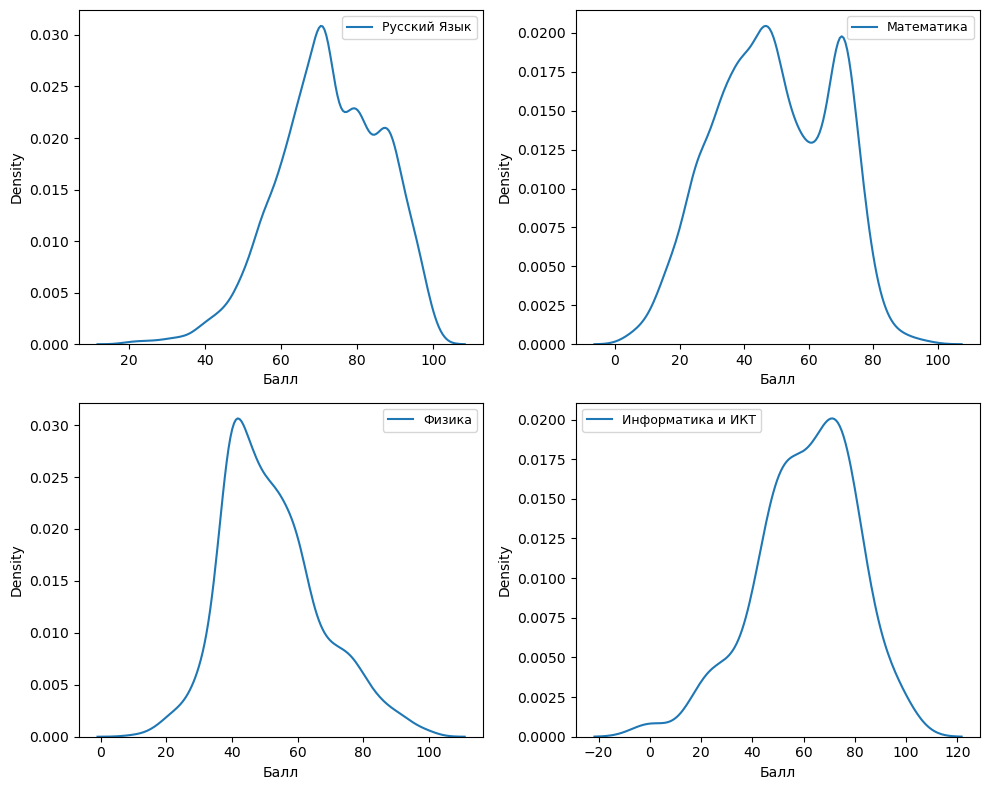

In [95]:
# Создание общей фигуры с четырьмя подграфиками
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Первый подграфик
sns.kdeplot(data=rl, x='Балл', label="Русский Язык", ax=ax[0, 0])
ax[0, 0].legend(fontsize=9)

# Второй подграфик
sns.kdeplot(data=math, x='Балл', label="Математика", ax=ax[0, 1])
ax[0, 1].legend(fontsize=9)

# Третий подграфик
sns.kdeplot(data=physics, x='Балл', label="Физика", ax=ax[1, 0])
ax[1, 0].legend(fontsize=9)

# Четвертый подграфик
sns.kdeplot(data=informatics, x='Балл', label="Информатика и ИКТ", ax=ax[1, 1])
ax[1, 1].legend(fontsize=9)

# Отобразить график
plt.tight_layout()
plt.show()

##### 6. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

###### «неудовлетворительно» < Минимального балла
###### «удовлетворительно» < 56
###### «хорошо» < 71
###### «отлично» >= 72

In [96]:
df["Шкала Оценивания"] = df.apply(lambda row: "Неудовлетворительно" if row["Балл"] < row["Минимальный балл"] else
                                     "Удовлетворительно" if row["Балл"] < 56 else
                                     "Хорошо" if row["Балл"] < 71 else "Отлично", axis=1)

df.head(3)

,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл,Дисциплина,Выше среднего,Зачет,Шкала Оценивания
№,,,,,,,,,,,,,,
1.0,117.0,11,М,341.0,1+++--1+-++---0---------0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8.0,20.0,24.0,Русский язык,False,False,Неудовлетворительно
2.0,148.0,12А,М,338.0,1+---+0--+---+0----++-+-0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8.0,20.0,24.0,Русский язык,False,False,Неудовлетворительно
3.0,152.0,13,Ж,104.0,2-----0--+----1---------1,0(1)0(3)0(1)0(3)0(2)0(2)0(3)1(3)0(2)1(2)1(1)1(1),NaN,9.0,22.0,24.0,Русский язык,False,False,Неудовлетворительно


Text(0.5, 1.0, 'Соотношение учащихся, сдавших 4 экзамена на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно»')

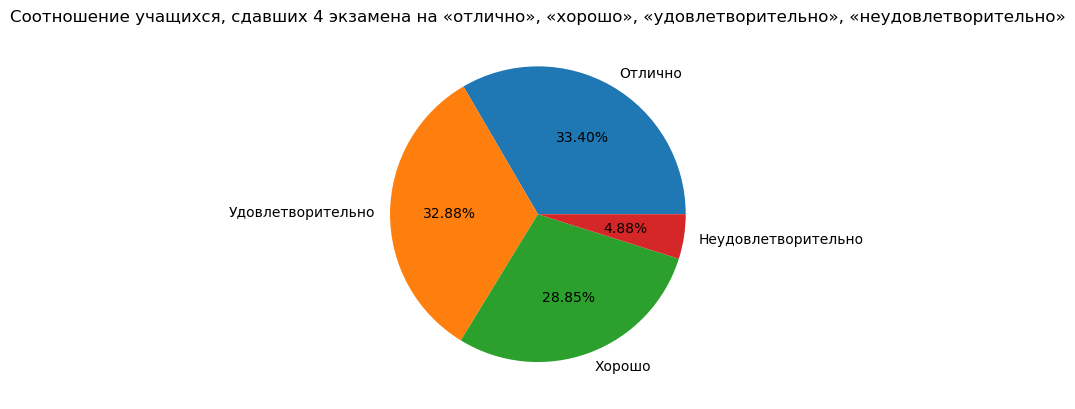

In [97]:
df["Шкала Оценивания"].value_counts().plot(kind="pie", autopct='%1.2f%%')

plt.ylabel("")
plt.title("Соотношение учащихся, сдавших 4 экзамена на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно»")

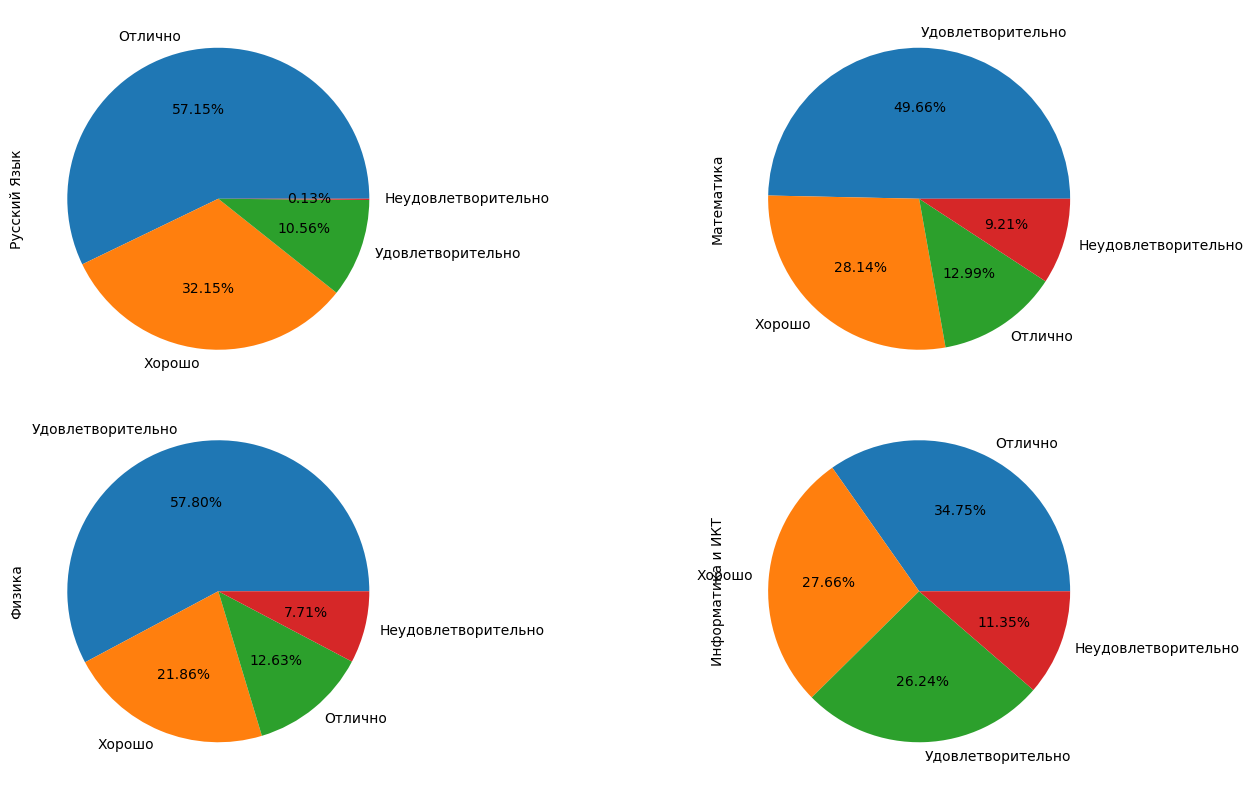

In [98]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))


# Первый подграфик
df[df["Дисциплина"] == "Русский язык"]["Шкала Оценивания"].value_counts().plot(kind="pie", x='Балл', label="Русский Язык", ax=ax[0, 0], autopct='%1.2f%%')
ax[0, 0]


# Второй подграфик
df[df["Дисциплина"] == "Математика"]["Шкала Оценивания"].value_counts().plot(kind="pie", x='Балл', label="Математика", ax=ax[0, 1], autopct='%1.2f%%')
ax[0, 1]


# Третий подграфик
df[df["Дисциплина"] == "Физика"]["Шкала Оценивания"].value_counts().plot(kind="pie", x='Балл', label="Физика", ax=ax[1, 0], autopct='%1.2f%%')
ax[1, 0]


# Четвертый подграфик
df[df["Дисциплина"] == "Информатика"]["Шкала Оценивания"].value_counts().plot(kind="pie", x='Балл', label="Информатика и ИКТ", ax=ax[1, 1], autopct='%1.2f%%')
ax[1, 1]


# Отобразить график
plt.tight_layout()
plt.show()

##### 7. Какое процентное соотношение юношей и девушек писало данный экзамен?


Text(0.5, 1.0, 'Соотношение юношей и девушек писавших 4 экзамена')

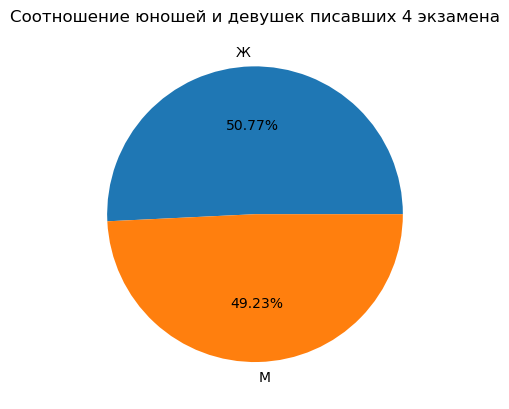

In [99]:
df["Пол"].value_counts().plot(kind="pie", autopct='%1.2f%%')

plt.ylabel("")
plt.title("Соотношение юношей и девушек писавших 4 экзамена")

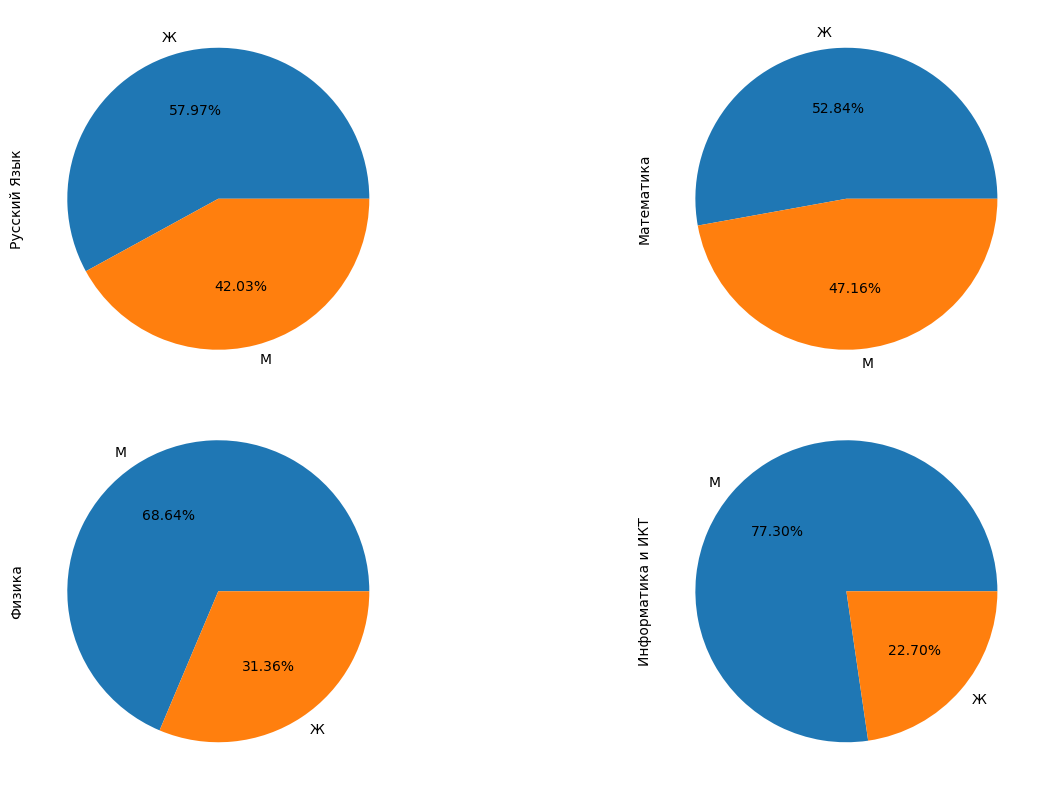

In [100]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))


# Первый подграфик
rl["Пол"].value_counts().plot(kind="pie", x='Балл', label="Русский Язык", ax=ax[0, 0], autopct='%1.2f%%')
ax[0, 0]


# Второй подграфик
math["Пол"].value_counts().plot(kind="pie", x='Балл', label="Математика", ax=ax[0, 1], autopct='%1.2f%%')
ax[0, 1]


# Третий подграфик
physics["Пол"].value_counts().plot(kind="pie", x='Балл', label="Физика", ax=ax[1, 0], autopct='%1.2f%%')
ax[1, 0]


# Четвертый подграфик
informatics["Пол"].value_counts().plot(kind="pie", x='Балл', label="Информатика и ИКТ", ax=ax[1, 1], autopct='%1.2f%%')
ax[1, 1]


# Отобразить график
plt.tight_layout()
plt.show()

##### 8. Сколько школ принимало участие в экзамене?


34 школы принимало участие в сумме за 4 экзамена


Text(0.5, 1.0, 'За 4 экзамена')

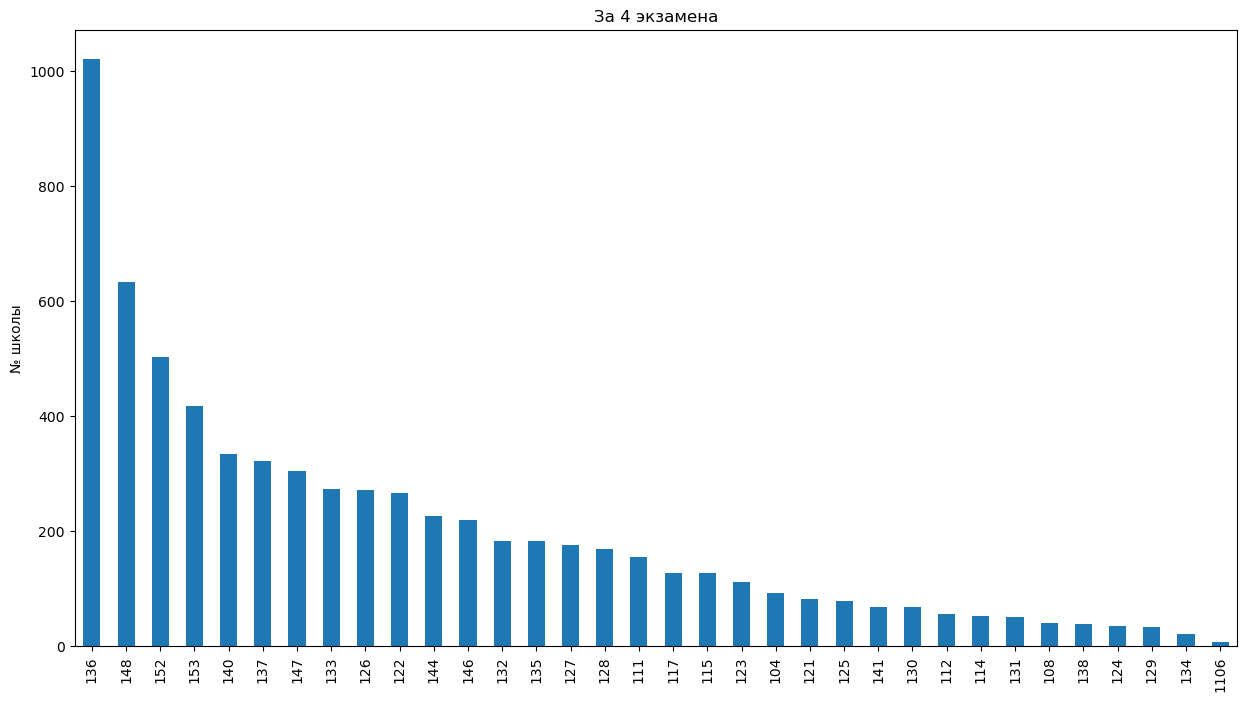

In [101]:
print(f"{df['№ школы'].nunique()} школы принимало участие в сумме за 4 экзамена")


plt.figure(figsize=(15, 8))
df["№ школы"].astype("int32").value_counts().plot(kind="bar")

plt.ylabel("№ школы")
plt.title("За 4 экзамена")

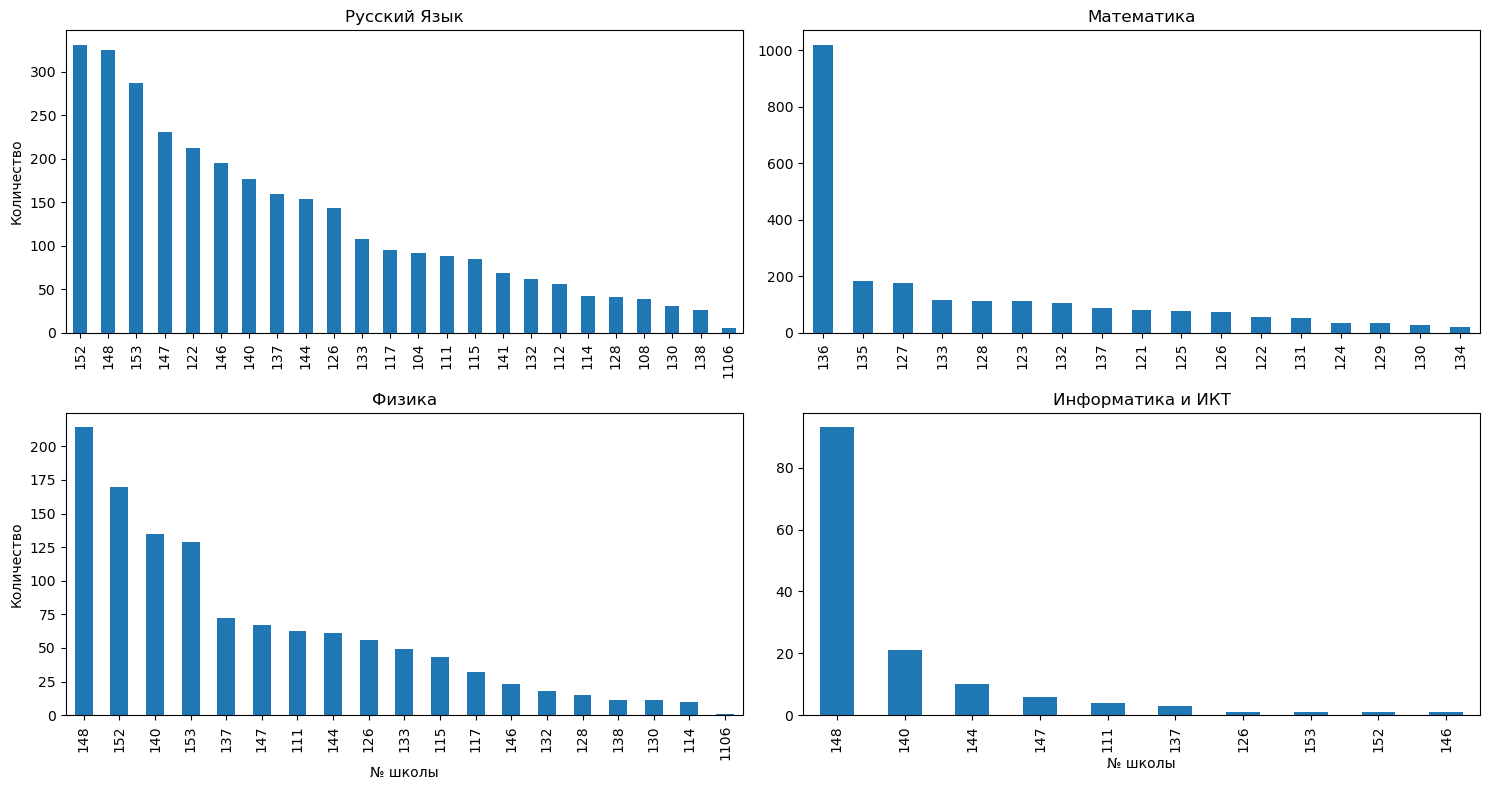

In [102]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))


# Первый подграфик
rl["№ школы"].astype("int32").value_counts().plot(kind="bar", ylabel="Количество", title="Русский Язык", ax=ax[0, 0])



# Второй подграфик
math["№ школы"].astype("int32").value_counts().plot(kind="bar", title="Математика", ax=ax[0, 1])



# Третий подграфик
physics["№ школы"].astype("int32").value_counts().plot(kind="bar", xlabel='№ школы', ylabel="Количество", title="Физика", ax=ax[1, 0])



# Четвертый подграфик
informatics["№ школы"].astype("int32").value_counts().plot(kind="bar", xlabel='№ школы', title="Информатика и ИКТ", ax=ax[1, 1])



# Отобразить график
plt.tight_layout()
plt.show()

##### 9. Сколько всего заданий с кратким ответом? С развернутым ответом?

In [103]:
df[df["Балл"] == 100]

,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл,Дисциплина,Выше среднего,Зачет,Шкала Оценивания
№,,,,,,,,,,,,,,
3041.0,122.0,11,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.0,24.0,Русский язык,True,True,Отлично
3042.0,147.0,11,Ж,347.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.0,24.0,Русский язык,True,True,Отлично
3043.0,148.0,11,Ж,337.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.0,24.0,Русский язык,True,True,Отлично
3044.0,146.0,11,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.0,24.0,Русский язык,True,True,Отлично
3045.0,147.0,11,Ж,340.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.0,24.0,Русский язык,True,True,Отлично
3046.0,147.0,11,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.0,24.0,Русский язык,True,True,Отлично
3047.0,147.0,11,Ж,337.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.0,24.0,Русский язык,True,True,Отлично
3048.0,144.0,11А,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.0,24.0,Русский язык,True,True,Отлично
1179.0,147.0,11,М,332.0,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)3(3),NaN,52.0,100.0,36.0,Физика,True,True,Отлично


Длина строки из столбца `Задания с кратким ответом` - `2+++++5+++++++2+++++++++4` будет являться `количеством заданий` \
У каждой дисциплины своя длина т.е. количество заданий

In [104]:
first = df["Задания с кратким ответом"].str.len().unique()

#1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1) replace`ом удаляю скобки и потом считаю длину строки
second = df["Задания с развёрнутым ответом"].str.replace("(", "").str.replace(")", "").str.len().unique()


print("Количество заданий с коротким ответом:")
[print(f"{k:>15}: {v}") for k, v in zip(["Русский Язык", "Математика", "Физика", "Информатика"], first)]


print("\n\nКоличество заданий с развернутым ответом:")
[print(f"{k:>15}: {v}") for k, v in zip(["Русский Язык", "Математика", "Физика", "Информатика"], second)]

Количество заданий с коротким ответом:
   Русский Язык: 25
     Математика: 12
         Физика: 27
    Информатика: 23


Количество заданий с развернутым ответом:
   Русский Язык: 24
     Математика: 14
         Физика: 10
    Информатика: 8


C:\Users\cvrsd\AppData\Local\Temp\ipykernel_12012\662071161.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  second = df["Задания с развёрнутым ответом"].str.replace("(", "").str.replace(")", "").str.len().unique()


[None, None, None, None]

### Как проверку можно взять по строке с каждой дисциплины
# Задания с кратким ответом:

In [105]:
print("Задания с кратким ответом:")
[print(f'{k:^18}: {frame["Задания с кратким ответом"].iloc[0]:^30} - длина равна {len(frame["Задания с кратким ответом"].iloc[0])}') for k, frame in zip(["Русский Язык", "Математика", "Физика", "Информатика и ИКТ"], [rl, math, physics, informatics])]

Задания с кратким ответом:
   Русский Язык   :   1+++--1+-++---0---------0    - длина равна 25
    Математика    :          ------+-----          - длина равна 12
      Физика      :  ----001---00---000--1-+0---   - длина равна 27
Информатика и ИКТ :    -----------------------     - длина равна 23


[None, None, None, None]

# Задания с развёрнутым ответом
# До обработки:

In [106]:
print("Задания с развёрнутым ответом:")
[print(f'{k:^18}: {frame["Задания с развёрнутым ответом"].iloc[0]:^50} - длина равна {len(frame["Задания с развёрнутым ответом"].iloc[0])}') for k, frame in zip(["Русский Язык", "Математика", "Физика", "Информатика и ИКТ"], [rl, math, physics, informatics])]

Задания с развёрнутым ответом:
   Русский Язык   :  0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1)  - длина равна 48
    Математика    :            0(2)0(2)0(2)0(3)0(3)0(4)0(4)            - длина равна 28
      Физика      :                0(3)0(3)0(3)0(3)0(3)                - длина равна 20
Информатика и ИКТ :                  0(3)0(2)0(3)0(4)                  - длина равна 16


[None, None, None, None]

# После обработки:

In [107]:
re.sub(r"\(\d+\)", "", rl["Задания с развёрнутым ответом"].iloc[0])

'000000000000'

In [108]:
re.sub(r"\(\d+\)", "", math["Задания с развёрнутым ответом"].iloc[0])

'0000000'

### Всё совпадает, аналогично с развернутым ответом, после удаления скобок

##### 10. Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В, ..., Вк
##### Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.

In [109]:
frame

,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл,Дисциплина,Выше среднего,Зачет,Задания с развёрнутым ответом ОБРАБОТАННЫЕ
№,,,,,,,,,,,,,,
1.0,148.0,13,М,505.0,-----------------------,0(3)0(2)0(3)0(4),NaN,0.0,0.0,40.0,Информатика,False,False,0000
2.0,147.0,11,М,328.0,-----------------------,0(3)0(2)0(3)0(4),NaN,0.0,0.0,40.0,Информатика,False,False,0000
3.0,111.0,11,М,330.0,---+---+-+-------------,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0,Информатика,False,False,0000
4.0,140.0,11,М,328.0,---+---------++--------,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0,Информатика,False,False,0000
5.0,148.0,11,М,328.0,----+---------+-----+--,0(3)0(2)0(3)0(4),NaN,3.0,20.0,40.0,Информатика,False,False,0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137.0,148.0,11,Ж,328.0,+++++++++++++++++++--++,3(3)2(2)3(3)4(4),NaN,33.0,94.0,40.0,Информатика,True,True,3234
138.0,147.0,11,М,333.0,+++++++++++++++++++++++,3(3)2(2)2(3)4(4),NaN,34.0,97.0,40.0,Информатика,True,True,3224
139.0,140.0,11,М,329.0,+++++++++++++++++++-+++,3(3)2(2)3(3)4(4),NaN,34.0,97.0,40.0,Информатика,True,True,3234


In [2]:
# def get_result(df, flag=True):
    
    
    
#     if flag:
#         length = len(df["Задания с кратким ответом"].iloc[0])
    
    
#     else:
#         df["Задания с развёрнутым ответом ОБРАБОТАННЫЕ"] = df["Задания с развёрнутым ответом"].apply(lambda x: re.sub(r"\(\d+\)", "", x))
#         length = len(re.sub(r"\(\d+\)", "", df["Задания с развёрнутым ответом ОБРАБОТАННЫЕ"].iloc[0]))

    
    
#     won = {k: v for k, v in zip(range(1, length + 1), [0] * length)}
#     lose = {k: v for k, v in zip(range(1, length + 1), [0] * length)}
    
        
#     switch = df["Задания с кратким ответом"] if flag else df["Задания с развёрнутым ответом ОБРАБОТАННЫЕ"]
    
#     for row in switch:
#         for i, symbol in enumerate(row, 1):
#             if symbol in "+123456789":
#                 won[i] += 1
#             else:
#                 lose[i] += 1
            
#     total = won[1] + lose[1]
        
#     return won, total, np.around(pd.DataFrame.from_dict(won, orient='index', columns=['Won']) / total * 100, 2)




# for k, frame in zip(["Русский Язык", "Математика", "Физика", "Информатика и ИКТ"], [rl, math, physics, informatics]):
    
#     won, total, other = get_result(frame)
    
#     print("Задания с кратким ответом")
#     print(f"% выполненным и невыполненным заданиям по предмету - {k}:")
#     for k, v in won.items():
        
#         answer = np.around(v / total * 100, 2)
        
#         print(f"{k:^2} задание:\nВыполнило   {answer:^5} % учащихся\nНевыполнило {np.around(100 - answer, 2):^5} % учащихся\n")
        
#     print("\n\n")
    
    


In [156]:
rl_df, math_df, physics_df, infrmtcs_df = [get_result(frame)[-1] for frame in [rl, math, physics, informatics]]

# Проверка
rl_df

,Won
1,98.69
2,92.88
3,87.34
4,77.30
5,58.96
6,90.62
7,95.05
8,75.59
9,84.12
10,96.88


In [ ]:
def plot_graphs(col, fltr_rl, fltr_mth, fltr_phsc, fltr_nfrmtcs, xlabel, ylabel):
    
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

    # Первый подграфик
    fltr_rl[col].plot(kind="bar", ylabel=ylabel, title="Русский Язык", ax=ax[0, 0])
    ax[0, 0].set_ylim(0, 100)

    # Второй подграфик
    fltr_mth[col].plot(kind="bar", title="Математика", ax=ax[0, 1])
    ax[0, 1].set_ylim(0, 100)

    # Третий подграфик
    fltr_phsc[col].plot(kind="bar", xlabel="№ задачи", title="Физика", ax=ax[1, 0])
    ax[1, 0].set_ylim(0, 100)

    # Четвертый подграфик
    fltr_nfrmtcs[col].plot(kind="bar", xlabel=xlabel, title="Информатика и ИКТ", ax=ax[1, 1])
    ax[1, 1].set_ylim(0, 100)

    # Отобразить график
    plt.tight_layout()
    plt.show()



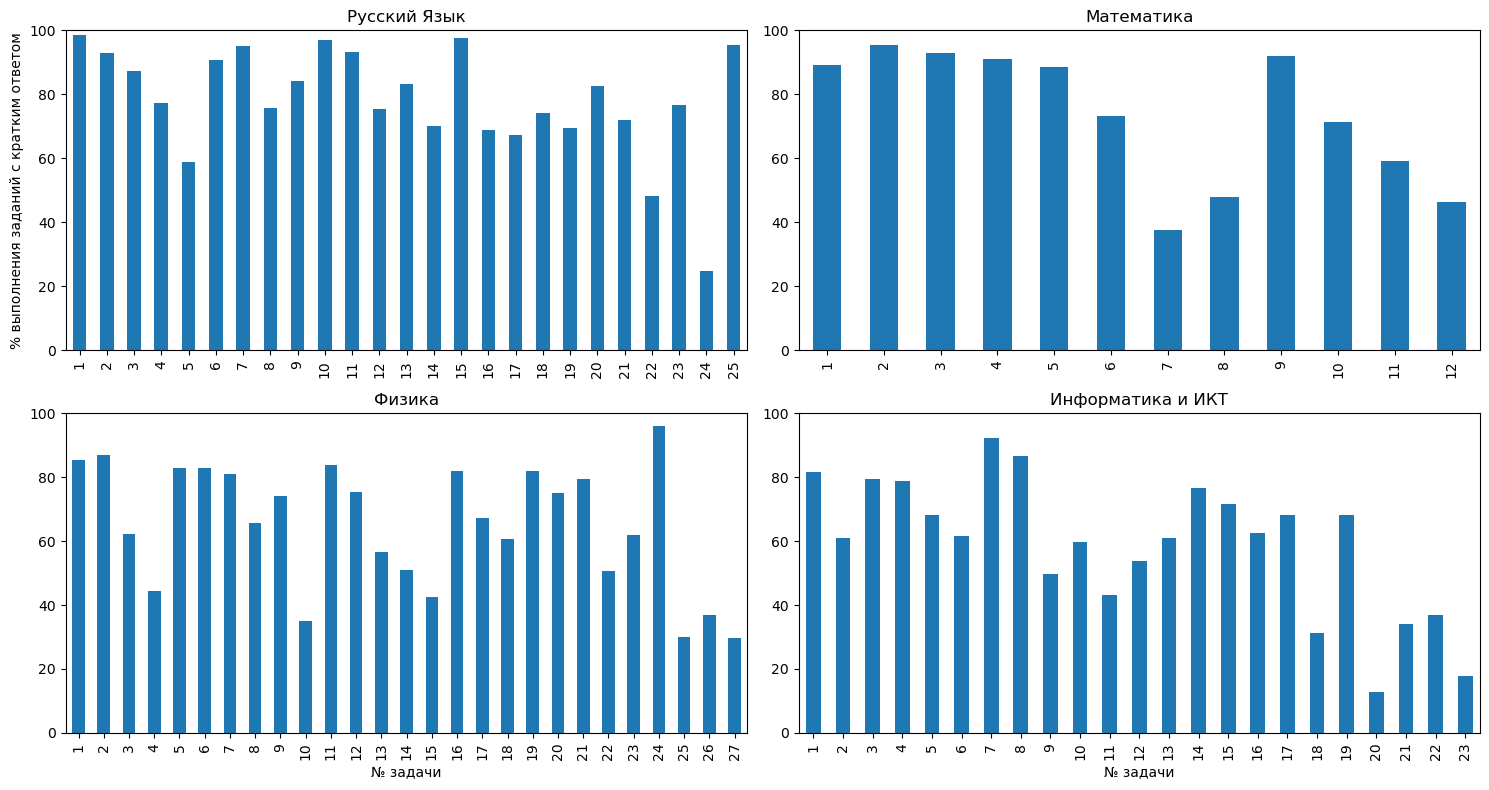

In [211]:
plot_graphs("Won", rl_df, math_df, physics_df, infrmtcs_df, '№ задачи', "% выполнения заданий с кратким ответом")

##### 11. Аналогично и с типом С (ответы с развернутым ответом)

In [1]:
# for k, frame in zip(["Русский Язык", "Математика", "Физика", "Информатика и ИКТ"], [rl, math, physics, informatics]):
    
#     won, total, other = get_result(frame, flag=False)
    
#     print("Задания с развёрнутым ответом")
#     print(f"% выполненным и невыполненным заданиям по предмету - {k}:")
#     for k, v in won.items():
        
#         answer = np.around(v / total * 100, 2)
        
#         print(f"{k:^2} задание:\nВыполнило   {answer:^5} % учащихся\nНевыполнило {np.around(100 - answer, 2):^5} % учащихся\n")
        
#     print("\n\n")

In [160]:
RL_df, MTH_df, PHSC_df, NFRMTCS_df = [get_result(frame, flag=False)[-1] for frame in [rl, math, physics, informatics]]

# Проверка
RL_df

,Won
1,96.75
2,94.72
3,94.46
4,94.26
5,96.46
6,97.44
7,92.39
8,81.50
9,84.19
10,81.73


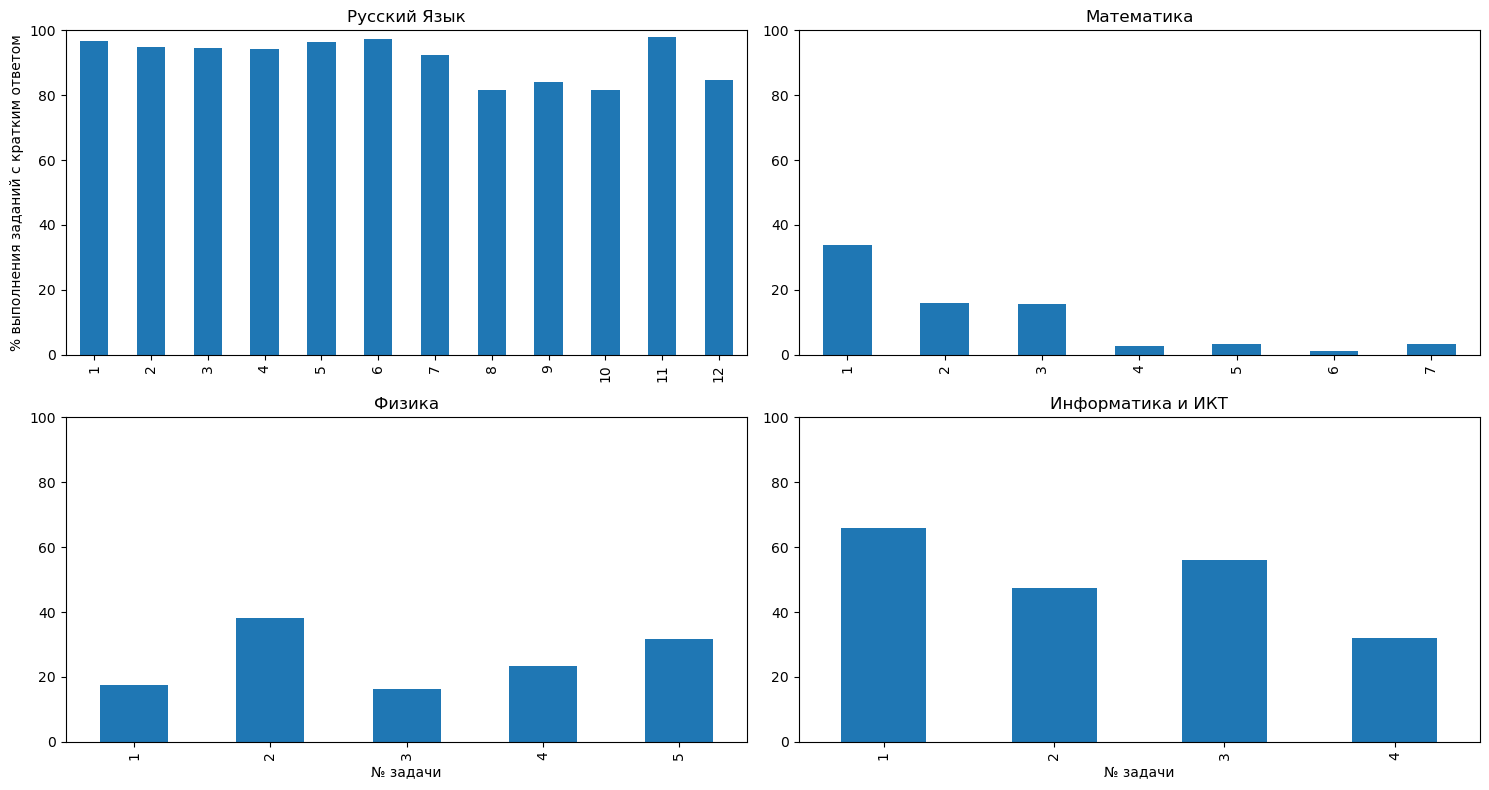

In [214]:
plot_graphs("Won", RL_df, MTH_df, PHSC_df, NFRMTCS_df, '№ задачи', "% выполнения заданий с кратким ответом")

##### 12. Сделайте анализ по двум школам: \
##### по всем выполненным заданиям типа В
##### по заданиям типа С больше 50%
##### по среднему баллу юношей и девушек

In [217]:
# Общие номера школ для всех 4 дисциплин

schools = list(set(rl["№ школы"].unique()) & set(math["№ школы"].unique()) & set(physics["№ школы"].unique()) & set(informatics["№ школы"].unique()))

schools

[137.0, 126.0]

In [223]:
fltr_rl1, fltr_mth1, fltr_phsc1, fltr_nfrmtcs1 = [get_result(frame)[-1] for frame in [
    rl[rl["№ школы"] == nums[0]],
    math[math["№ школы"] == nums[0]],
    physics[physics["№ школы"] == nums[0]], 
    informatics[informatics["№ школы"] == nums[0]]
]]

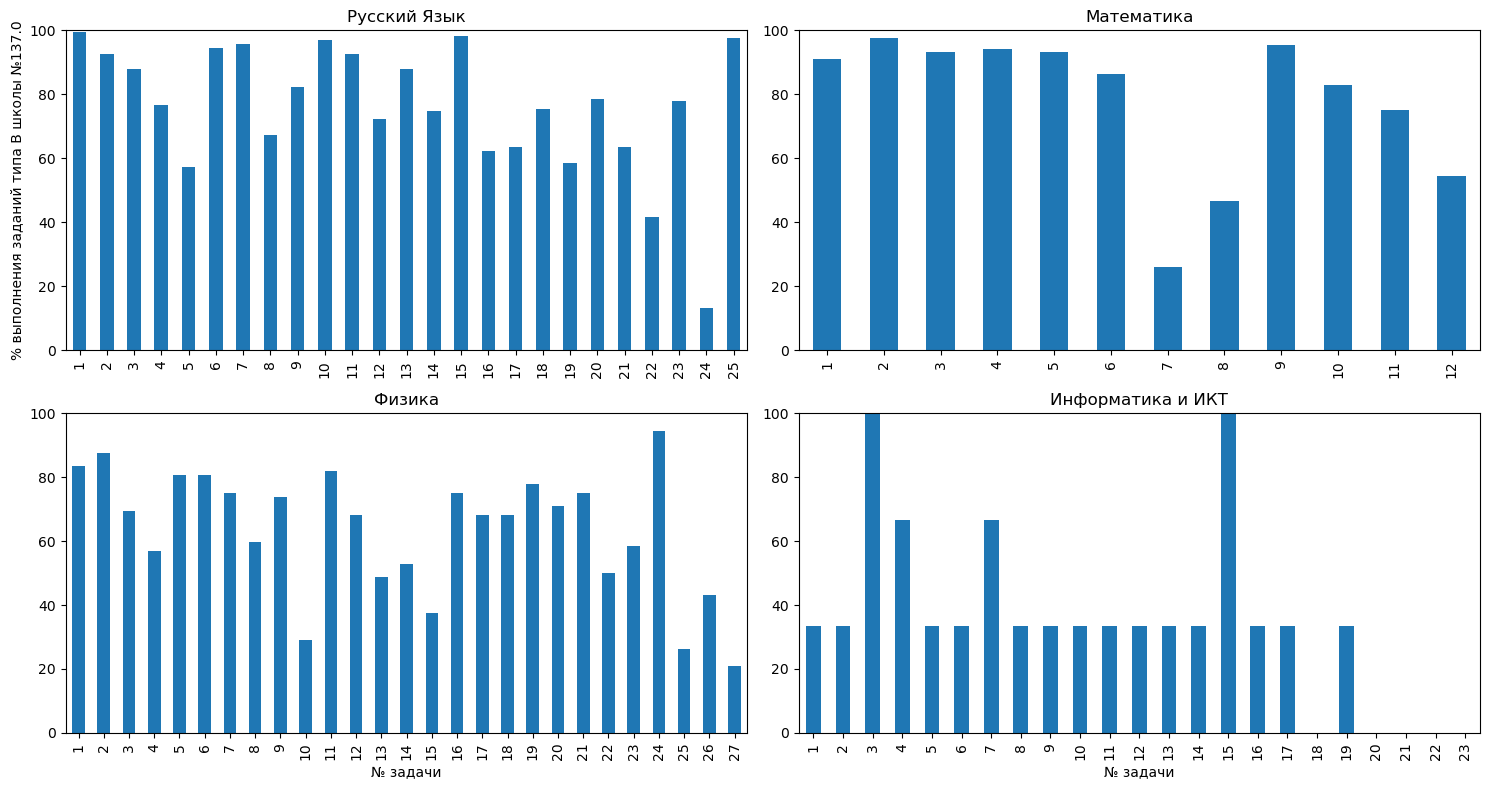

In [224]:
plot_graphs("Won", fltr_rl1, fltr_mth1, fltr_phsc1, fltr_nfrmtcs1,"№ задачи", f"% выполнения заданий типа B школы №{nums[0]}")

In [221]:
fltr_rl2, fltr_mth2, fltr_phsc2, fltr_nfrmtcs2 = [get_result(frame)[-1] for frame in [
    rl[rl["№ школы"] == nums[1]],
    math[math["№ школы"] == nums[1]],
    physics[physics["№ школы"] == nums[1]], 
    informatics[informatics["№ школы"] == nums[1]]
]]

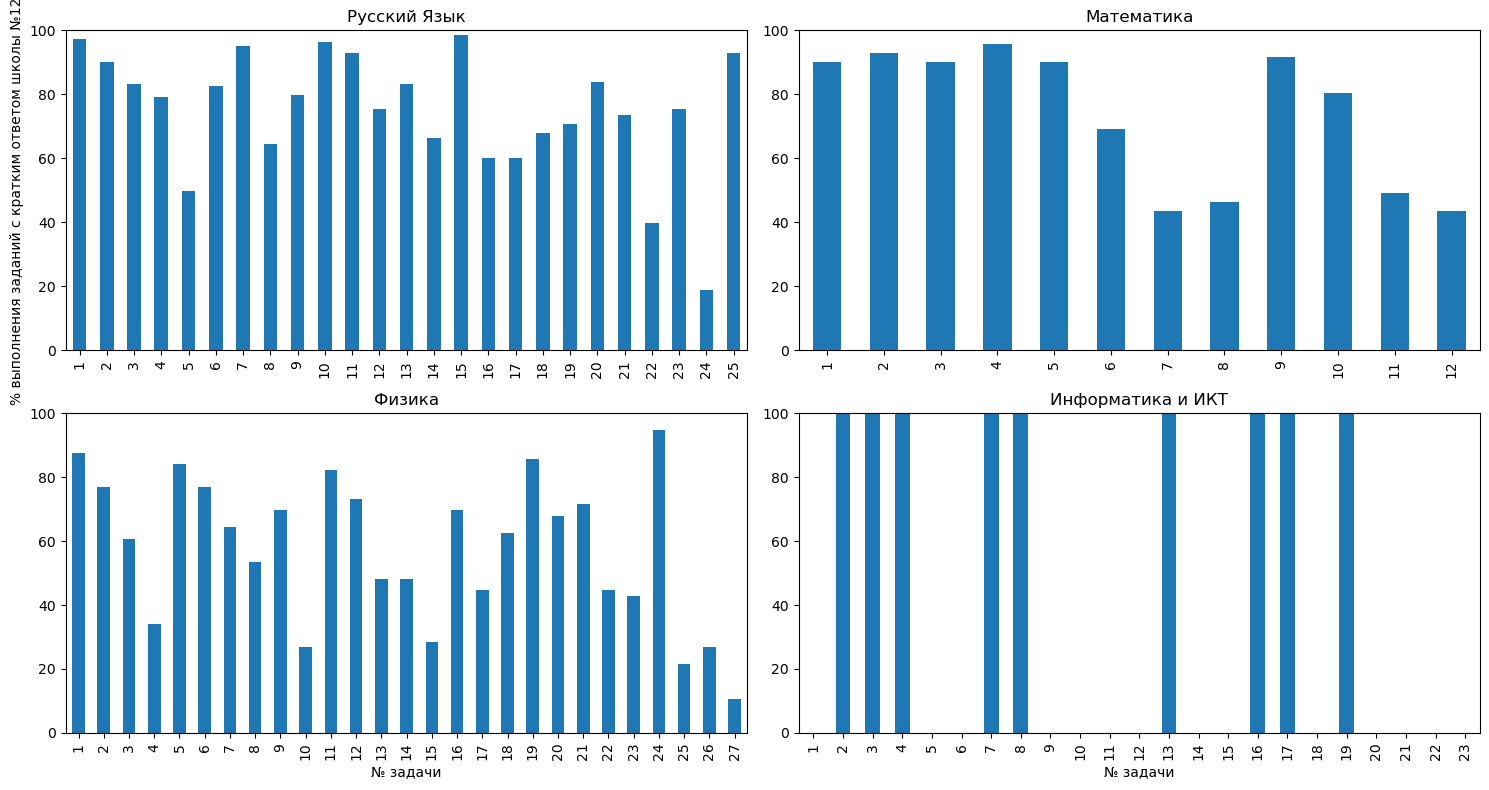

In [210]:
plot_graphs("Won", fltr_rl2, fltr_mth2, fltr_phsc2, fltr_nfrmtcs2,"№ задачи", f"% выполнения заданий типа B школы №{nums[1]}")

In [246]:
def get_mean(df, sex, school):
    bank = df[(df["Пол"] == sex) & (df["№ школы"] == school)]
    return np.around(bank["Балл"].mean(), 2)

In [247]:
m_rl, m_mth, m_phsc, m_nfrmtcs = [get_mean(frame, "М", nums[0]) for frame in [rl, math, physics, informatics]]
f_rl, f_mth, f_phsc, f_nfrmtcs = [get_mean(frame, "Ж", nums[0]) for frame in [rl, math, physics, informatics]]


# Средний балл по Юношам и Девушкам в школе № 136
frame = pd.DataFrame([(m_rl, f_rl), (m_mth, f_mth), (m_phsc, f_phsc), (m_nfrmtcs, f_nfrmtcs)], columns=['М', 'Ж'], index=["Русский Язык", "Математика", "Физика", "Информатика"])

frame

,М,Ж
Русский Язык,67.53,73.10
Математика,54.97,54.71
Физика,49.55,52.19
Информатика,38.33,NaN


In [248]:
m_rl, m_mth, m_phsc, m_nfrmtcs = [get_mean(frame, "М", nums[1]) for frame in [rl, math, physics, informatics]]
f_rl, f_mth, f_phsc, f_nfrmtcs = [get_mean(frame, "Ж", nums[1]) for frame in [rl, math, physics, informatics]]

# Средний балл по Юношам и Девушкам в школе № 12
frame = pd.DataFrame([(m_rl, f_rl), (m_mth, f_mth), (m_phsc, f_phsc), (m_nfrmtcs, f_nfrmtcs)], columns=['М', 'Ж'], index=["Русский Язык", "Математика", "Физика", "Информатика"])

frame

,М,Ж
Русский Язык,64.16,71.62
Математика,49.09,46.64
Физика,45.32,46.64
Информатика,46.00,NaN
